In [ ]:
!git clone https://github.com/blacksilvergeek/gpt_killer/

Cloning into 'gpt_killer'...
remote: Enumerating objects: 1174, done.
remote: Counting objects: 100% (968/968), done.
remote: Compressing objects: 100% (957/957), done.
remote: Total 1174 (delta 25), reused 928 (delta 9), pack-reused 206
Receiving objects: 100% (1174/1174), 185.42 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (107/107), done.
Updating files: 100% (1071/1071), done.


In [ ]:
!pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=b634432a83b1cf18e9ad535fcc4bd93c6779146ee50b4dc7d82d1eef4ea1e15c
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [ ]:
%cd gpt_killer/Dataset
!pwd

/content/gpt_killer/Dataset
/content/gpt_killer/Dataset


In [ ]:
import os
import zipfile
import torch
import torch_geometric
import WAN
import numpy as np
import mat73
#import torch
from torch.nn.functional import normalize

import networkx as nx
from networkx import from_numpy_array
from torch_geometric.data import Data,Dataset
from torch_geometric.utils import from_networkx
import json
dataset = 'authorshipData.mat' # store the human paper
# here the aim is to convert the text into WAN

# the data:
-----------------------------------------transferbility research--------------------------------------
- response: generated data only specify author
- response2: generated data specify author and topic
- response3: data specify differnt author and topic from human  but in the same randomness
- response4: data in different author/topic in differnt ranomness
- response5: this data is useless, i just restric it on high randomness
----------------
## training data set
- response_title, use the selected author and titles the same as human_data


In [ ]:
for file in os.listdir():
    if file.endswith(".zip"):
        print("unzipping " + file)
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()
            print("unzipped " + file)

unzipping response3_WANS.txt.zip
unzipped response3_WANS.txt.zip
unzipping response4_WANS 3.txt.zip
unzipped response4_WANS 3.txt.zip
unzipping response4_WANS 2.txt.zip
unzipped response4_WANS 2.txt.zip
unzipping graph_dataset.txt.zip
unzipped graph_dataset.txt.zip
unzipping graph_dataset_response.txt.zip
unzipped graph_dataset_response.txt.zip
unzipping response4_WANS.txt.zip
unzipped response4_WANS.txt.zip
unzipping graph_dataset_response_title.txt.zip
unzipped graph_dataset_response_title.txt.zip
unzipping 10_poem.zip
unzipped 10_poem.zip
unzipping response5_WANS.txt.zip
unzipped response5_WANS.txt.zip
unzipping response2_WANS.txt.zip
unzipped response2_WANS.txt.zip
unzipping response_WANS.zip
unzipped response_WANS.zip


In [ ]:
human_data = mat73.loadmat(dataset)
import pickle
with open("response_WANS",'rb') as f:
    (wordcounts,WANS)= pickle.load(f)
with open("response2_WANS.txt",'rb') as f:
    (val_wordcounts,val_WANS) =pickle.load(f)


with open("response3_WANS.txt",'rb') as f:
    val_wordcounts3, val_WANS3 = pickle.load(f)

with open("response4_WANS.txt",'rb') as f:
    val_wordcounts4, val_WANS4 = pickle.load(f)
with open("response5_WANS.txt",'rb') as f:
    val_wordcounts5, val_WANS5 = pickle.load(f)

In [ ]:
len(WANS)

1812

In [ ]:
np.array(WANS[0]).shape

(211, 211)

In [ ]:
function_words = [word[0] for word in human_data['function_words']]

In [ ]:
def load_gpt(function_words,windowWidth,file = "responses.json",content_index = -1):
    gpt_response = file
    gpt_papers = []
    WANS = []

    wordcounts = []
    with open(gpt_response,'r') as f:
        count = 0
        while(True):
            response = f.readline().strip()
            if response:
                #print("an error ",dict(eval(response)))
                try:
                    gpt_papers.append(dict(eval(response)))
                except:
                    count+=1
                    print("an error ",count)


            else:
                break
    print("valid dictionary",len(gpt_papers))
    for paper in gpt_papers:
        #paper = json.loads()

        papers = list(paper.items()) # all dictionary the last items is paper
        #print(papers)

        writer,novel = papers[content_index]
        #print(novel)

        #print(papers)
        #print(papers)




            # generate WAN for novel and store it in to gptWANs
        (text1Scores, text1Counts) = WAN.countFWs(WAN.cleanUp(novel),function_words,windowWidth)
        WAN1 = WAN.normalize(text1Scores)

        WANS.append(WAN1)
        wordcounts.append(text1Counts)
    return wordcounts, WANS

In [ ]:
train_wordcounts, train_WANS = load_gpt(function_words[:211],5,"responses_title.json")


流式输出内容被截断，只能显示最后 5000 行内容。
        Looking in window at word number 2 which is 'of'
        Looking in window at word number 3 which is 'such'
        Looking in window at word number 4 which is 'sadness'
        Looking in window at word number 0 which is 'midst'
        Looking in window at word number 1 which is 'of'
        Looking in window at word number 2 which is 'such'
        Looking in window at word number 3 which is 'sadness'
        Looking in window at word number 4 which is 'there'
        Looking in window at word number 0 which is 'such'
        Looking in window at word number 1 which is 'sadness'
        Looking in window at word number 2 which is 'there'
        Looking in window at word number 3 which is 'was'
        Looking in window at word number 4 which is 'a'
        Looking in window at word number 0 which is 'sadness'
        Looking in window at word number 1 which is 'there'
        Looking in window at word number 2 which is 'was'
        Looking in win

In [ ]:
train_wordcounts

[[5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  13,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  3,
  0,
  0,
  0,
  0,
  0,
  5,
  0,
  0,
  0,
  0,
  0,
  4,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  18,
  0,
  3,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  3,
  30,
  0,
  0,
  3,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  7,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  2,
  0,
  3,
  0,
  0,
  0,
  1,
  0,
  1,
  

In [ ]:
def generate_graphs(wordcounts,WANS2):
    Graphs = []
    count=0
    for i in range(len(wordcounts)):
        adj_matrix = np.array(WANS2[i])
        #print(val_wordcounts,adj_matrix)
        try:
            graph = from_numpy_array(adj_matrix,create_using=nx.DiGraph)

            data = from_networkx(graph)

            edge_index = data.edge_index
            edge_attr = data.weight
            signal = torch.tensor(wordcounts[i],dtype =torch.float64 )

            signal = (signal-signal.mean())/(signal.std())

            g = Data(x = signal.reshape(-1,1), edge_index = edge_index,edge_attr = edge_attr,y = torch.tensor([[0]])) # i define chat gpt's label as zero
            Graphs.append(g)
        except:
            count+=1
            print(data)
            print(count)

    return Graphs

In [ ]:
train_Graphs = generate_graphs(train_wordcounts,train_WANS)

In [ ]:
for i in range(len(human_data["all_authors"])):
    print(human_data["all_authors"][i])
    author_excerpts = torch.tensor(human_data["all_wans"][i])

    num_papers = author_excerpts.shape[-1]
    for num in range(92):#num_papers): # keep balanced num between true/false samples
        adj_matrix = author_excerpts[:,:,num]
        signal = human_data["all_freqs"][i][:,num].reshape(-1,1)
        signal = torch.tensor(signal,dtype=torch.float64)
        signal = (signal-signal.mean())/(signal.std())
        y = torch.tensor([[1]])
        adj_matrix = np.array(adj_matrix)

        adj_matrix /= (adj_matrix.sum(axis = 1).reshape(-1,1)+0.0000001)
        graph = from_numpy_array(adj_matrix,create_using=nx.DiGraph)

        data = from_networkx(graph)
        edge_index = data.edge_index
        edge_attr = data.weight
        g = Data(x = signal, edge_index = edge_index,edge_attr = edge_attr,y = y) # i define chat gpt's label as zero
        train_Graphs.append(g)

['abbott']
['stevenson']
['alcott']
['alger']
['allen']
['austen']
['bronte']
['cooper']
['dickens']
['garland']
['hawthorne']
['james']
['melville']
['page']
['thoreau']
['twain']
['doyle']
['irving']
['poe']
['jewett']
['wharton']


In [ ]:
with open("graph_dataset_response_title.txt",'wb') as f:
    pickle.dump(train_Graphs,f)

In [ ]:
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
train_test = train_test_split(train_Graphs,train_size = 0.7,test_size = 0.3, shuffle=True)
print(len(train_Graphs),train_Graphs[12])
train_loader = DataLoader(train_test[0],batch_size = 128)
test_loader =  DataLoader(train_test[1],batch_size = 128)

3078 Data(x=[211, 1], edge_index=[2, 156], edge_attr=[156], y=[1, 1])


In [ ]:
# get all y of train_Graphs
_y = []
for graph in train_Graphs:
    _y.append(graph.y.item())
# get number of 1 and 0
print(_y.count(1),_y.count(0))

1932 1146


In [ ]:
# all different number in _y
print(set(_y))

{0, 1}


### SVM

In [ ]:
# svm
from sklearn import svm
from sklearn.model_selection import cross_val_score

svm_x = []
svm_y = []
for graph in train_Graphs:
    svm_x.append(np.array(graph.x).flatten())
    svm_y.append(np.array(graph.y).flatten())
# convert to array
svm_x = np.array(svm_x)
svm_y = np.array(svm_y).flatten()

# pca to 10d
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(svm_x)
svm_x = pca.transform(svm_x)



# train_test_split
from sklearn.model_selection import train_test_split
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(svm_x, svm_y, test_size=0.2, random_state=0)


# train svm
clf = svm.SVC()
clf.fit(x_train_svm, y_train_svm)

# test svm
clf.score(x_test_svm,y_test_svm)


0.935064935064935

In [ ]:
from torch.nn import Module,Linear,ReLU,Dropout,Sigmoid,ModuleList
from torch.nn.functional import tanh
from torch_geometric.nn import GCNConv
class GCNN(Module):
    def __init__(self,in_channel,hidden_channels,out_channel,dropout_rate,resize_num =211 ):
        super().__init__()
        self.convs = []

        prev_channels = in_channel
        for channel in hidden_channels:
            self.convs.append(GCNConv(prev_channels,channel))
            prev_channels = channel
        self.convs = torch.nn.ModuleList(self.convs)
        self.linear = Linear(prev_channels*resize_num,out_channel)
        self.relu = ReLU()
        self.dropout = Dropout(dropout_rate)
        self.sigmoid = Sigmoid()
        self.tanh = tanh

    def forward(self,x,edge_index,edge_attr,batch_size = 128):
        #print(x.reshape(batch_size,-1))
        for i, conv in enumerate(self.convs):


            x = conv(x,edge_index,edge_attr)
            x = self.dropout(x)
            if i != len(self.convs)-1:
                x = self.relu(x)
        #print(x.reshape(batch_size,-1))
        x = x.reshape(batch_size,-1)
        #print(x)
        #x = self.tanh(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        #print(x)


        return x



model = GCNN(1,[8,1],1,dropout_rate = 0.5)

In [ ]:
# class_weights = torch.tensor([1,2])
loss = torch.nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
def train(model,criteria,optimizer,epoch,train_loader,test,test_loader):
    train_accs = []
    test_accs = []
    for i in range(epoch):
        losses = 0
        total_count = 0
        accs = 0
        for batch in train_loader:
            #print(batch)
            optimizer.zero_grad()
            x = batch.x

            edge_index = batch.edge_index
            edge_attr = batch.edge_attr
            batch_size  = batch.y.shape[0]
            #print(batch_size)
            prediction = model.forward(x.float(),edge_index,edge_attr,batch.y.shape[0]).float()

            #print(prediction)


            loss = criteria(prediction,batch.y.float())
            loss.backward()
            optimizer.step()
            #accs = test(model,test_loader)
            losses+=loss
            total_count+=1

            prediction = prediction > 0.5


            accs += (prediction == batch.y).sum()/prediction.shape[0]

        test_acc = test(model,test_loader)
        print("epoch ",i," is ",loss/total_count," accs is ", accs/total_count)#," test acc ",accs)
        train_accs.append(accs/total_count)
        test_accs.append(test_acc)
    return train_accs, test_accs

def test(model,test_loader):
    total_count = 0
    accs = 0
    for batch in test_loader:
        x = batch.x
        edge_index = batch.edge_index
        edge_attr = batch.edge_attr
        #print(batch)
        prediction = model.forward(x.float(),edge_index,edge_attr,batch.y.shape[0]).float()
        total_count+=1
        prediction = prediction > 0.5
        accs += (prediction == batch.y).sum()/prediction.shape[0]
    #print("test  accs is ", accs/total_count)#," test acc ",accs)
    return accs/total_count

train_accs, test_accs = train(model,loss,optimizer,20,train_loader,test,test_loader)

epoch  0  is  tensor(0.0368, grad_fn=<DivBackward0>)  accs is  tensor(0.6354)
epoch  1  is  tensor(0.0331, grad_fn=<DivBackward0>)  accs is  tensor(0.6706)
epoch  2  is  tensor(0.0307, grad_fn=<DivBackward0>)  accs is  tensor(0.7113)
epoch  3  is  tensor(0.0267, grad_fn=<DivBackward0>)  accs is  tensor(0.7919)
epoch  4  is  tensor(0.0255, grad_fn=<DivBackward0>)  accs is  tensor(0.8468)
epoch  5  is  tensor(0.0196, grad_fn=<DivBackward0>)  accs is  tensor(0.8853)
epoch  6  is  tensor(0.0187, grad_fn=<DivBackward0>)  accs is  tensor(0.9137)
epoch  7  is  tensor(0.0145, grad_fn=<DivBackward0>)  accs is  tensor(0.9237)
epoch  8  is  tensor(0.0119, grad_fn=<DivBackward0>)  accs is  tensor(0.9426)
epoch  9  is  tensor(0.0118, grad_fn=<DivBackward0>)  accs is  tensor(0.9357)
epoch  10  is  tensor(0.0115, grad_fn=<DivBackward0>)  accs is  tensor(0.9475)
epoch  11  is  tensor(0.0101, grad_fn=<DivBackward0>)  accs is  tensor(0.9547)
epoch  12  is  tensor(0.0080, grad_fn=<DivBackward0>)  accs is

In [ ]:
def true_predict(model,test_loader):
    total_count = 0
    accs = 0
    y_true = []
    y_pred = []
    for batch in test_loader:
        x = batch.x
        edge_index = batch.edge_index
        edge_attr = batch.edge_attr
        #print(batch)
        prediction = model.forward(x.float(),edge_index,edge_attr,batch.y.shape[0]).float()
        total_count+=1
        prediction = prediction > 0.5
        accs += (prediction == batch.y).sum()/prediction.shape[0]
        y_true.append(batch.y)
        y_pred.append(prediction)
    #print("test  accs is ", accs/total_count)#," test acc ",accs)
    y_true = torch.cat(y_true)
    y_pred = torch.cat(y_pred)
    return y_true,y_pred
from sklearn.metrics import confusion_matrix


y_true,y_pred = true_predict(model,test_loader)

In [ ]:
### all in one score
## accs recall and precision F1 microF1 at the same time
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


def score_all_in_one(y_true,y_pred):
    accs = accuracy_score(y_true,y_pred)
    precision,recall,f1,_ = precision_recall_fscore_support(y_true,y_pred,average='binary')
    microF1 = f1_score(y_true,y_pred,average='micro')
    # reture all the value
    return accs,precision,recall,f1,microF1



In [ ]:
score_all_in_one(y_true,y_pred)

(0.9588744588744589,
 0.9571917808219178,
 0.9772727272727273,
 0.9671280276816608,
 0.9588744588744589)

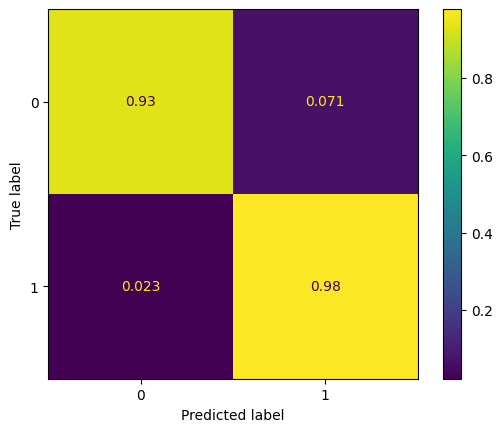

In [ ]:
# import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# plot confusion matrix
cm = confusion_matrix(y_true,y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

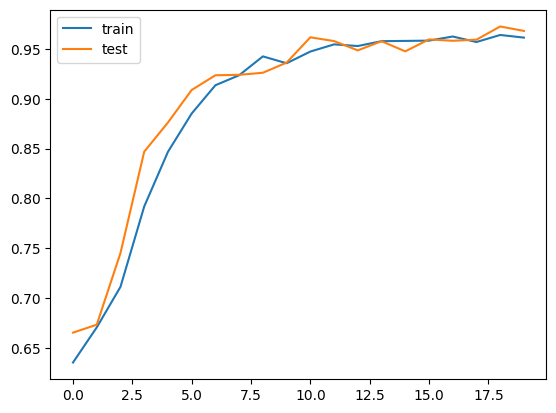

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_accs,label = "train")
plt.plot(test_accs,'-',label = "test")
plt.legend()
plt.show()

In [ ]:
from torch_geometric.explain import Explainer, GNNExplainer
from torch_geometric.data import Batch

In [ ]:
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type="object",
    edge_mask_type="object",
    model_config=dict(
        mode='binary_classification',
        task_level='graph',
        return_type="probs",
    ),
)


In [ ]:

data = Batch.from_data_list(train_Graphs)

In [ ]:
node_mask = np.empty((211,1))
count = 0

explanation = explainer(data.x.float(),data.edge_index,target = data.y,edge_attr = data.edge_attr,batch_size = data.y.shape[0])



/usr/local/lib/python3.10/dist-packages/torch_geometric/explain/explainer.py:189: UserWarning: The 'target' should not be provided for the explanation type 'model'
  warnings.warn(


In [ ]:
node_mask = explanation.node_mask

In [ ]:
node_mask = node_mask.reshape(211,-1)
print(node_mask.shape)
node_mask = node_mask.sum(axis=1)
print(node_mask.shape)

torch.Size([211, 3078])
torch.Size([211])


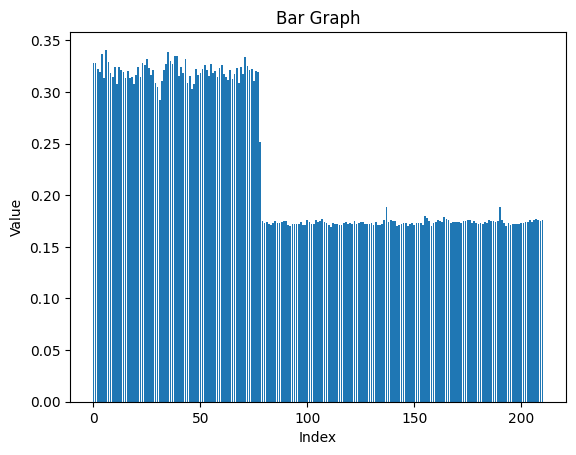

In [ ]:
node_mask/=len(train_Graphs)
(node_mask-node_mask.min())/(node_mask.max()-node_mask.min())
x = np.arange(211)
plt.bar(x, node_mask)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

# Display the plot
plt.show()

# try attention mechnisum

In [ ]:
from torch_geometric.nn import ChebConv,GATConv
class GAT(Module):
    def __init__(self,in_channel,hidden_channels,out_channel,dropout_rate,resize_num =211 ):
        super().__init__()
        self.convs = []

        prev_channels = in_channel
        for channel in hidden_channels:
            self.convs.append(GATConv(prev_channels,channel,head = 2))
            prev_channels = channel
        self.convs = torch.nn.ModuleList(self.convs)
        self.linear = Linear(prev_channels*resize_num,out_channel)
        self.relu = ReLU()
        self.dropout = Dropout(dropout_rate)
        self.sigmoid = Sigmoid()
        self.tanh = tanh

    def forward(self,x,edge_index,edge_attr,batch_size = 128):
        #print(x.reshape(batch_size,-1))
        for i, conv in enumerate(self.convs):


            x = conv(x,edge_index,edge_attr)
            x = self.dropout(x)
            if i != len(self.convs)-1:
                x = self.relu(x)
        #print(x.reshape(batch_size,-1))
        x = x.reshape(batch_size,-1)
        #print(x)
        x = self.tanh(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        #print(x)


        return x

loss = torch.nn.BCELoss()



model2 = GAT(1,[16,1],1,0.5)
optimizer = torch.optim.Adam(model2.parameters(),lr = 0.001)
train_accs, test_accs = train(model2,loss,optimizer,30,train_loader,test,test_loader)

epoch  0  is  tensor(0.0374, grad_fn=<DivBackward0>)  accs is  tensor(0.6162)
epoch  1  is  tensor(0.0343, grad_fn=<DivBackward0>)  accs is  tensor(0.6321)
epoch  2  is  tensor(0.0302, grad_fn=<DivBackward0>)  accs is  tensor(0.6518)
epoch  3  is  tensor(0.0243, grad_fn=<DivBackward0>)  accs is  tensor(0.8225)
epoch  4  is  tensor(0.0204, grad_fn=<DivBackward0>)  accs is  tensor(0.9480)
epoch  5  is  tensor(0.0171, grad_fn=<DivBackward0>)  accs is  tensor(0.9743)
epoch  6  is  tensor(0.0146, grad_fn=<DivBackward0>)  accs is  tensor(0.9824)
epoch  7  is  tensor(0.0120, grad_fn=<DivBackward0>)  accs is  tensor(0.9858)
epoch  8  is  tensor(0.0102, grad_fn=<DivBackward0>)  accs is  tensor(0.9853)
epoch  9  is  tensor(0.0097, grad_fn=<DivBackward0>)  accs is  tensor(0.9871)
epoch  10  is  tensor(0.0084, grad_fn=<DivBackward0>)  accs is  tensor(0.9903)
epoch  11  is  tensor(0.0077, grad_fn=<DivBackward0>)  accs is  tensor(0.9884)
epoch  12  is  tensor(0.0072, grad_fn=<DivBackward0>)  accs is

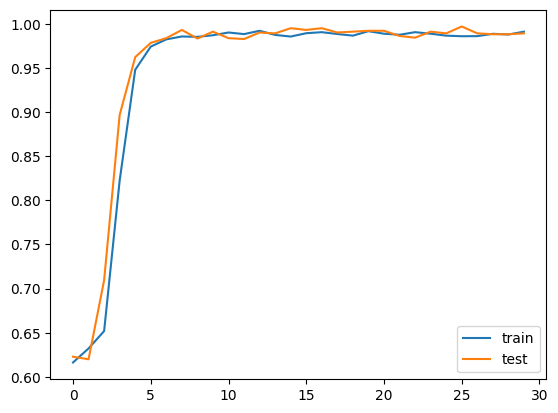

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_accs,label = "train")
plt.plot(test_accs,'-',label = "test")
plt.legend()
plt.show()

In [ ]:
data = Batch.from_data_list(train_Graphs)
explainer2 = Explainer(
    model=model2,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type="object",
    edge_mask_type="object",
    model_config=dict(
        mode='binary_classification',
        task_level='graph',
        return_type="probs",
    ),
)
explanation2 = explainer2(data.x.float(),data.edge_index,target = data.y,edge_attr = data.edge_attr,batch_size = data.y.shape[0])
node_mask2 = explanation2.node_mask




In [ ]:
node_mask2 = node_mask2
node_mask2 = node_mask2.reshape(211,-1)
node_mask2 = node_mask2.sum(axis=1)/len(train_Graphs)
node_mask2

tensor([0.3051, 0.2889, 0.2946, 0.2995, 0.3008, 0.2941, 0.3191, 0.3285, 0.3000,
        0.2878, 0.2854, 0.2836, 0.2875, 0.3081, 0.3034, 0.2840, 0.2817, 0.2807,
        0.2986, 0.2907, 0.2748, 0.3073, 0.2835, 0.2976, 0.2995, 0.3034, 0.2950,
        0.3100, 0.2949, 0.2657, 0.2700, 0.2573, 0.2847, 0.2776, 0.2983, 0.3118,
        0.2900, 0.2936, 0.2989, 0.2803, 0.2578, 0.2936, 0.2986, 0.2891, 0.2822,
        0.2677, 0.2675, 0.2538, 0.2995, 0.3347, 0.2830, 0.3244, 0.3050, 0.2800,
        0.2960, 0.2995, 0.2938, 0.2941, 0.2946, 0.3181, 0.2970, 0.2962, 0.2826,
        0.2851, 0.3022, 0.2712, 0.2725, 0.2752, 0.2787, 0.2895, 0.2807, 0.3124,
        0.3084, 0.3021, 0.2822, 0.2676, 0.2937, 0.2996, 0.2538, 0.1729, 0.1760,
        0.1898, 0.1931, 0.2039, 0.1851, 0.1747, 0.1734, 0.1639, 0.1702, 0.1706,
        0.1881, 0.1752, 0.1870, 0.1800, 0.1864, 0.1980, 0.2073, 0.2039, 0.2181,
        0.2258, 0.2233, 0.2098, 0.1951, 0.1964, 0.1963, 0.1954, 0.1912, 0.1871,
        0.2068, 0.2024, 0.1944, 0.1950, 

torch.Size([211])
['a', 'bit', 'couple', 'aboard', 'about', 'above', 'absent', 'according', 'accordingly', 'across', 'after', 'against', 'ahead', 'albeit', 'all', 'along', 'alongside', 'although', 'amid', 'amidst', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyone', 'anything', 'around', 'as', 'aside', 'astraddle', 'astride', 'at', 'away', 'bar', 'barring', 'because', 'before', 'behind', 'below', 'beneath', 'beside', 'besides', 'between', 'beyond', 'both', 'but', 'by', 'can', 'certain', 'circa', 'close', 'concerning', 'consequently', 'considering', 'could', 'dare', 'despite', 'down', 'due', 'during', 'each', 'either', 'enough', 'every', 'everybody', 'everyone', 'everything', 'except', 'excluding', 'failing', 'few', 'fewer', 'following', 'for', 'from', 'given', 'heaps', 'hence', 'however', 'if', 'in', 'spite', 'view', 'including', 'inside', 'instead', 'into', 'it', 'its', 'itself', 'less', 'like', 'little', 'loads', 'lots', 'many', 'may', 'might', 'minus', 'more', 'm

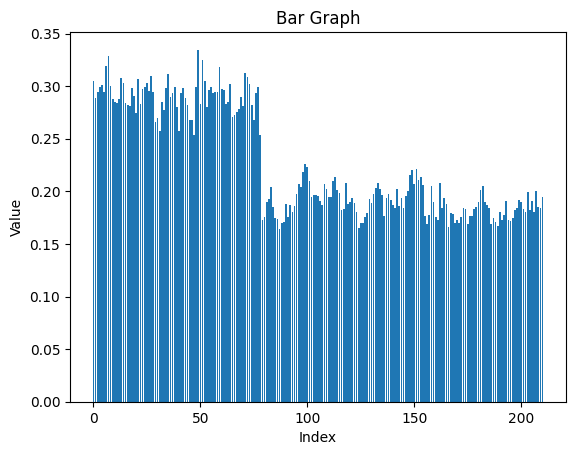

In [ ]:
print(node_mask2.shape)
print(function_words)
node_maske2 = (node_mask2-node_mask2.min())/(node_mask2.max()-node_mask2.min())
x = np.arange(211)
plt.bar(x, node_mask2)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

# Display the plot
plt.show()

In [ ]:
print(len(train_Graphs))

# test the transferbility of data:


In [ ]:
####### first transferbility: the performance facing new generated chatgpt data######################
with open("response5_WANS.txt",'rb') as f:
    (val_wordcounts,val_WANS) =pickle.load(f)

In [ ]:

def append_human_data(length,Graphs):
    for i in range(len(human_data["all_authors"])):
        print(human_data["all_authors"][i])
        author_excerpts = torch.tensor(human_data["all_wans"][i])

        num_papers = author_excerpts.shape[-1]
        for num in range(length):#num_papers): # keep balanced num between true/false samples
            adj_matrix = author_excerpts[:,:,num]
            signal = human_data["all_freqs"][i][:,num].reshape(-1,1)
            signal = torch.tensor(signal,dtype=torch.float64)
            signal = (signal-signal.mean())/(signal.std())
            y = torch.tensor([[1]])
            adj_matrix = np.array(adj_matrix)

            adj_matrix /= (adj_matrix.sum(axis = 1).reshape(-1,1)+0.0000001)
            graph = from_numpy_array(adj_matrix,create_using=nx.DiGraph)

            data = from_networkx(graph)
            edge_index = data.edge_index
            edge_attr = data.weight
            g = Data(x = signal, edge_index = edge_index,edge_attr = edge_attr,y = y) # i define chat gpt's label as zero
            Graphs.append(g)
    return Graphs
def generate_graphs(wordcounts,WANS2,index = 0):
    Graphs = []
    count=0
    for i in range(len(wordcounts)):
        adj_matrix = np.array(WANS2[i])
        #print(val_wordcounts,adj_matrix)
        try:
            graph = from_numpy_array(adj_matrix,create_using=nx.DiGraph)

            data = from_networkx(graph)

            edge_index = data.edge_index
            edge_attr = data.weight
            signal = torch.tensor(wordcounts[i],dtype =torch.float64 )

            signal = (signal-signal.mean())/(signal.std())

            g = Data(x = signal.reshape(-1,1), edge_index = edge_index,edge_attr = edge_attr,y = torch.tensor([[index]])) # i define chat gpt's label as zero
            Graphs.append(g)
        except:
            count+=1
            print(data)
            print(count)

    return Graphs

In [ ]:
val_graphs =  generate_graphs(val_wordcounts,val_WANS,index = 0)
print(len(val_graphs))
val_graphs = append_human_data(33,val_graphs)

640
['abbott']
['stevenson']
['alcott']
['alger']
['allen']
['austen']
['bronte']
['cooper']
['dickens']
['garland']
['hawthorne']
['james']
['melville']
['page']
['thoreau']
['twain']
['doyle']
['irving']
['poe']
['jewett']
['wharton']


In [ ]:
val_loader = DataLoader(val_graphs,batch_size = 128)
test(model,val_loader)

tensor(0.8558)

In [ ]:
test(model2,val_loader)


tensor(0.8686)

# new human text with original chatgpt data

In [ ]:
with open("poem_graphs.txt",'rb') as f:
    poem_graphs = pickle.load(f)
    print(len(poem_graphs))

889


In [ ]:
train_Graphs = generate_graphs(train_wordcounts,train_WANS)
print(len(train_Graphs))

1146


In [ ]:
val2_graphs = poem_graphs#+train_Graphs
val2_loader = DataLoader(val2_graphs,batch_size = 128)

In [ ]:
print(test(model,val2_loader))
print(test(model2,val2_loader))

tensor(0.3416)
tensor(0.1026)


[[  0   0]
 [606 283]]


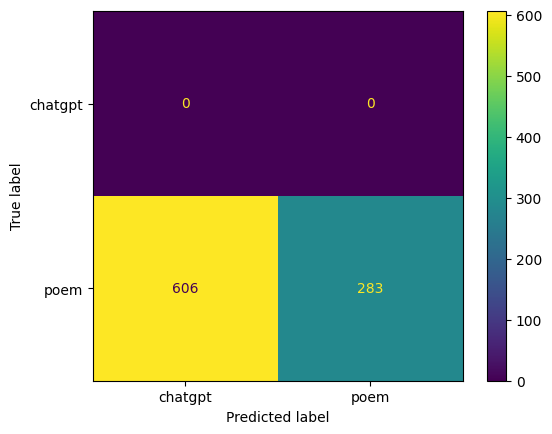

In [ ]:
y_true,y_pred = true_predict(model,val2_loader)
print(confusion_matrix(y_true,y_pred))
# plot confusion matrix
cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ["chatgpt","poem"])
disp.plot()

# conclusion:
## it is hard to identify human data
## main reason maybe the gener of original data has not seen poem

In [ ]:
val_data = Batch.from_data_list(poem_graphs[:700]+train_Graphs)
val_data2 = Batch.from_data_list(val_graphs)

In [ ]:
explanation = explainer(val_data.x.float(),val_data.edge_index,target = val_data.y,edge_attr = val_data.edge_attr,batch_size = val_data.y.shape[0])




/usr/local/lib/python3.10/dist-packages/torch_geometric/explain/explainer.py:189: UserWarning: The 'target' should not be provided for the explanation type 'model'
  warnings.warn(


torch.Size([211, 1846])
torch.Size([211])


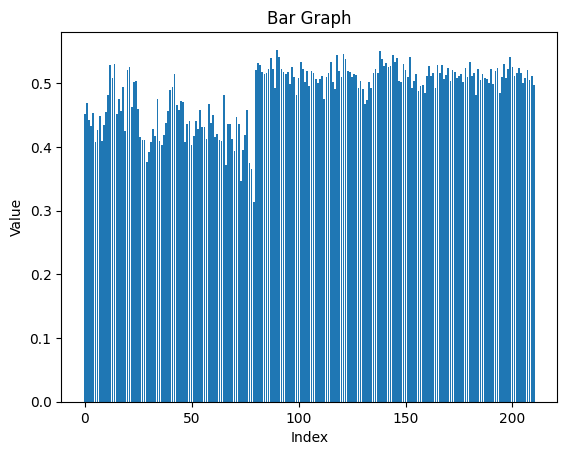

In [ ]:
node_mask = explanation.node_mask
node_mask = node_mask.reshape(211,-1)
print(node_mask.shape)
node_mask = node_mask.sum(axis=1)
print(node_mask.shape)
node_mask/=len(train_Graphs)
(node_mask-node_mask.min())/(node_mask.max()-node_mask.min())
x = np.arange(211)
plt.bar(x, node_mask)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

# Display the plot
plt.show()

torch.Size([211, 1333])
torch.Size([211])


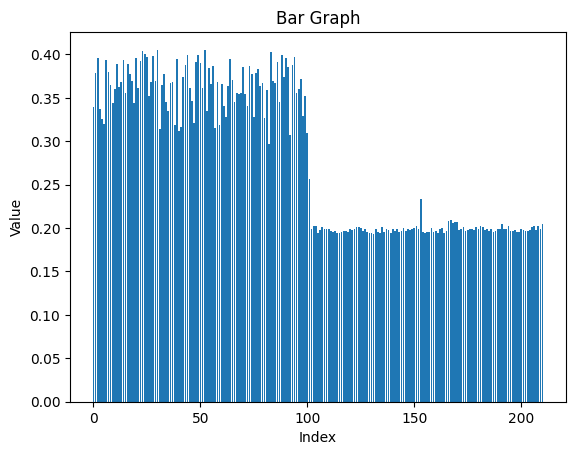

In [ ]:
explanation = explainer(val_data2.x.float(),val_data2.edge_index,target = val_data2.y,edge_attr = val_data2.edge_attr,batch_size = val_data2.y.shape[0])
node_mask = explanation.node_mask
node_mask = node_mask.reshape(211,-1)
print(node_mask.shape)
node_mask = node_mask.sum(axis=1)
print(node_mask.shape)
node_mask/=len(train_Graphs)
(node_mask-node_mask.min())/(node_mask.max()-node_mask.min())
x = np.arange(211)
plt.bar(x, node_mask)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

# Display the plot
plt.show()



## the explainer on two set of data on attention model

In [ ]:
explanation2 = explainer2(val_data.x.float(),val_data.edge_index,target = val_data.y,edge_attr = val_data.edge_attr,batch_size = val_data.y.shape[0])
node_mask2 = explanation2.node_mask

In [ ]:

node_mask2 = node_mask2
node_mask2 = node_mask2.reshape(211,-1)
node_mask2 = node_mask2.sum(axis=1)/len(train_Graphs)
node_mask2
print(node_mask2.shape)
print(function_words)
node_maske2 = (node_mask2-node_mask2.min())/(node_mask2.max()-node_mask2.min())
x = np.arange(211)
plt.bar(x, node_mask2)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

# Display the plot
plt.show()

In [ ]:
explanation2 = explainer2(val_data2.x.float(),val_data2.edge_index,target = val_data2.y,edge_attr = val_data2.edge_attr,batch_size = val_data2.y.shape[0])
node_mask2 = explanation2.node_mask

In [ ]:
node_mask2 = node_mask2
node_mask2 = node_mask2.reshape(211,-1)
node_mask2 = node_mask2.sum(axis=1)/len(train_Graphs)
node_mask2
print(node_mask2.shape)
print(function_words)
node_maske2 = (node_mask2-node_mask2.min())/(node_mask2.max()-node_mask2.min())
x = np.arange(211)
plt.bar(x, node_mask2)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Graph')

# Display the plot
plt.show()

# another training method
## data argumentation

In [ ]:
with open("response_WANS",'rb') as f:
    (val_wordcounts2,val_WANS2) =pickle.load(f)
val_graphs3 =  generate_graphs(val_wordcounts2,val_WANS2,index = 0)
print(len(val_graphs3))
val_graphs3 = append_human_data(25,val_graphs3)

In [ ]:
val3_loader = DataLoader(val_graphs3,batch_size = 128)

In [ ]:
model2 = GAT(1,[16,1],1,0.3)
optimizer = torch.optim.Adam(model2.parameters(),lr = 0.001)
train_accs, test_accs = train(model2,loss,optimizer,200,val_loader,test,test_loader)

In [ ]:
model = GCNN(1,[16,1],1,0.3)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)
train_accs, test_accs = train(model,loss,optimizer,200,val_loader,test,test_loader)

In [ ]:
val2_graphs = poem_graphs#+train_Graphs
val2_loader = DataLoader(val2_graphs,batch_size = 128)
test(model,val2_loader)

In [ ]:
test(model2,val2_loader)

In [ ]:
test(model2,val3_loader)

In [ ]:
test(model,val3_loader)